In [1]:
import pickle
import pandas as pd
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [2]:
colab = True
if colab is True:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    basedir = '/content/drive/My Drive/AlternusVeraDataSets2019/Spartans/Sudha/'
    print('Changing directory to the Project Directory')
    %cd /content/drive/My Drive/AlternusVeraDataSets2019/Spartans/Sudha/
    !ls
    !pwd
else:
    basedir = '/Users/admin/AlternusVeraDataSets2019/Spartans/Sudha/'

import pickle
basedir = pickle.load(open('./models/basedir.pkl', 'rb'))
trainfile = basedir + 'input_data/processed/trainnews_d2v_processed.csv'
testfile = basedir + 'input_data/processed/testnews_d2v_processed.csv'

global dataTrain
global accscore

dataTrain = pd.read_csv(trainfile, sep=',')
dataTest = pd.read_csv(testfile, sep=',')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
Changing directory to the Project Directory
/content/drive/My Drive/AlternusVeraDataSets2019/Spartans/Sudha
 AlternusVera2_SudhaAmarnath.mp4
 AlternusVera_3_RunFile.ipynb
 AlternusVeraSprint3_SudhaAmarnath.mp4
 classes
 input_data
 models
 Spartans_AlternusVera_4_Final_Integration.ipynb
 Spartans_AlternusVera_4_Final_Workbook.ipynb
'Sudha_Amarnath(013709956)_AlternusVeraIndividual_3.ipynb'
'Sudha_Amarnath(013709956)_AlternusVeraIndividual.ipynb'
/content/drive

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
News Coverage Model Trained - accuracy:   0.495659
Sensational Feature Prediction - accuracy:   0.590371
Index(['headline_text', 'clean', 'vader_polarity', 'sentiment_score'], dtype='object')
Sentiment Analysis Model Trained - accuracy:   0.951855
Party Affiliation Model Trained - accuracy:   0.565436
Clickbait Model Trained - accuracy:   0.976875
Spam Score Model Trained - accuracy:   0.563191
trueZeroAuthors= 13
fakeZeroAuthors= 85
trueOneAuthors= 36
fakeOneAuthors= 24
trueMoreThanOneAuthors= 71
fakeMoreThanOneAuthors= 11
accuracy= 0.8421052631578947
Author Credibility Trained - accuracy:   0.842105


,site name,type of site,registration
0,16wmpo.com,imposter site,"scottsdale, ariz. **"
1,24online.news,imposter site,"panama, pa. **"
2,24wpn.com,fake news,"veles, macedonia"
3,24x365live.com,fake news,"kobenhavn, denmark"
4,247newsmedia.com,fake news,"kumanovo, macedonia"


['imposter site' 'fake news' 'parody site' 'some fake stories']
Model slope:     2.8672921260228002e-05
Model intercept: 0.41180985978637996
R2 score: 0.04612397796223422
Source Content - accuracy:   0.710526
Word Frequency Model Trained - accuracy:   0.599053


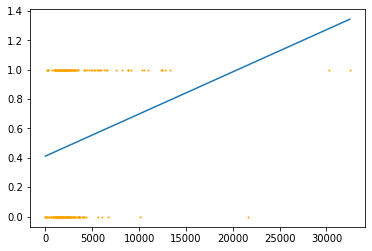

In [3]:


from classes import NewsCoverage
from classes import SensationalPrediction
from classes import SentimentAnalysis
from classes import PartyAffiliation
from classes import Clickbait
from classes import SpamScoreFeature
from classes import AuthorCredibility
from classes import SourceReputation
from classes import SourceContent
from classes import WordFrequency




newsCoverage = NewsCoverage()
sensationalPrediction = SensationalPrediction()
sentimentAnalysis = SentimentAnalysis()
partyAffiliation = PartyAffiliation()
clickbait = Clickbait()
spamScoreFeature = SpamScoreFeature()
authorCredibility = AuthorCredibility()
sourceReputation = SourceReputation()
sourceContent = SourceContent()
wordFrequency = WordFrequency()


In [0]:
def isValidNews(headline_text, party="", print_news=True):
    
    accur = [newsCoverage.getScore(), 
             sensationalPrediction.getScore(),
             sentimentAnalysis.getScore(),
             partyAffiliation.getScore(),
             clickbait.getScore(),
             spamScoreFeature.getScore()] # using the (normalized) accuracy as weigths for 
    w = [float(i)/sum(accur) for i in accur]
    sumW = 0
    prob = []
    prob.append(w[0] * newsCoverage.predictScore(headline_text))
    sumW += w[0]
    prob.append(w[1] * sensationalPrediction.predictScore(headline_text))
    sumW += w[1]
    prob.append(w[2] * sentimentAnalysis.predictScore(headline_text))
    sumW += w[2]
    prob.append(w[3] * partyAffiliation.predictScore(headline_text,party))
    sumW += w[3]
    prob.append(w[4] * clickbait.predictScore(headline_text))
    sumW += w[4]
    prob.append(w[5] * spamScoreFeature.predictScore(headline_text))
    sumW += w[5]
 
 
    #prob.append(w[6] * sourceContent.predictScore(len(headline_text.split())))
    #sumW += w[6]

    #prob.append(w[7] * wordFrequency.predictScore(headline_text)
    #sumW += w[7]

    
    probTotal = sum(prob[0:len(prob)]) / sumW
    if print_news is True:
      if probTotal > 0.5:
          print('Valid News:', 'Score:', probTotal, 'name:', headline_text)
      else:
          print('Fake  News:', 'Score:', probTotal, 'name:', headline_text)
        
    return probTotal

In [5]:
isValidNews('Says the Annies List political group supports third-trimester abortions on demand.', 'republican', 4)

0.5242166357529723

In [6]:
dataTrain.columns


Index(['Unnamed: 0', 'jsonid', 'label', 'headline_text', 'subject', 'speaker',
       'speakerjobtitle', 'stateinfo', 'partyaffiliation', 'barelytruecounts',
       'falsecounts', 'halftruecounts', 'mostlytrueocunts',
       'pantsonfirecounts', 'context', 'clean', 'cleanlist', 'topics',
       'topicsparsedlist', 'topicsparsed', 'doc2vector_values', 'topdoc0',
       'doc2vec0', 'doc2vec1', 'doc2vec2', 'doc2vectop1', 'doc2vectop25',
       'doc2vectop50', 'doc2vectop75', 'doc2veclast', 'midabovezero',
       'score0minus1', 'score1minus2', 'score0minus2', 'score0minustop1',
       'doc2vecsimilarity', 'encoded_label'],
      dtype='object')

In [0]:
import warnings
warnings.filterwarnings('ignore')

predicted_news_processed = basedir + 'input_data/processed/predicted_news_processed.csv'

predictedNewsDf = pd.DataFrame(columns=['valid_news', 'predict_score', 'headline_text'])

for index, row in dataTrain.iterrows():
    name= row['headline_text']
    party = row['partyaffiliation']
    pred = isValidNews(name, party, False)
    predictedNewsDf.at[index, 'valid_news'] = True if pred >= .5 else False
    predictedNewsDf.at[index, 'predict_score'] = pred
    predictedNewsDf.at[index, 'headline_text'] = name

predictedNewsDf.to_csv(predicted_news_processed, sep=',')


In [8]:
predictedNewsDf.head()

,valid_news,predict_score,headline_text
0,True,0.524217,Says the Annies List political group supports ...
1,True,0.759055,When did the decline of coal start? It started...
2,True,0.564048,"Hillary Clinton agrees with John McCain ""by vo..."
3,True,0.501207,Health care reform legislation is likely to ma...
4,True,0.721772,The economic turnaround started at the end of ...
